In [39]:
#Import depdendencies.
import os
import pandas as pd
import json
from pprint import pprint
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
#import numpy as np
#import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

In [2]:
#filepath = os.path.join("\Resources","cloth1010.json")
filepath = os.path.join("Resources","Decision_Tree_Final.csv")
print(filepath)

Resources\Decision_Tree_Final.csv


In [3]:
#read csv file into the dataframe. 
data_df = pd.read_csv(filepath)
#data_df = pd.read_json(filepath)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74977 entries, 0 to 74976
Data columns (total 7 columns):
Brand     74977 non-null int64
Fabric    74977 non-null int64
Bust      74977 non-null float64
Height    74977 non-null float64
Hip       74977 non-null float64
Length    74977 non-null int64
Size      74977 non-null int64
dtypes: float64(3), int64(4)
memory usage: 4.0 MB


In [4]:
data_df.head(5)

,Brand,Fabric,Bust,Height,Hip,Length,Size
0,4,2,32.0,5.6,37.000000,1,4
1,1,5,34.0,5.6,36.000000,3,4
2,1,5,34.0,5.3,40.358501,1,4
3,3,5,32.0,5.1,35.000000,2,4
4,4,2,32.0,5.6,32.000000,1,4


In [17]:
data_df["Size"].unique()

array([ 4,  8, 12, 32, 26, 20,  1, 15, 38, 18, 11,  3, 24, 21, 30,  5,  9,
        7, 13, 27, 33,  0,  6, 31, 10, 14, 17,  2, 25], dtype=int64)

In [49]:
X=data_df["Brand"]
y=data_df["Size"]

In [14]:
print(type(y))

<class 'pandas.core.series.Series'>


Text(0,0.5,'Size')

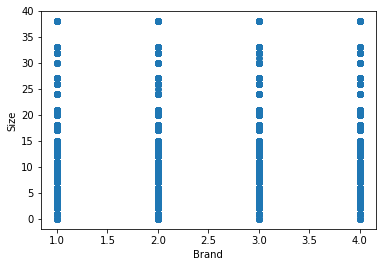

In [50]:
##Plot brand vs size for any discernible trend or clustering information.
plt.scatter(X, y)
plt.xlabel("Brand")
plt.ylabel("Size")

Text(0,0.5,'Size')

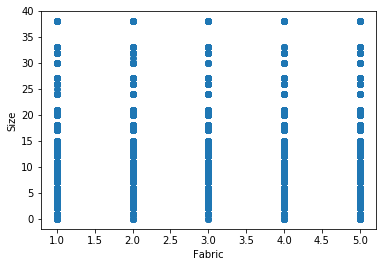

In [52]:
##plot Fabric vs size
plt.scatter(data_df["Fabric"],y)
plt.xlabel("Fabric")
plt.ylabel("Size")


In [53]:
#save figure for review. 
plt.show()
plt.savefig("cloth_data_FabricvsSize.png")

#savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

In [27]:
# Import kmeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [28]:
#Fit the data using kmeans. 
kmeans.fit(data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
# Predict the clusters usinf the model. 
predicted_clusters = kmeans.predict(data_df)

In [24]:
print(type(predicted_clusters))

<class 'numpy.ndarray'>


In [34]:
predicted_clusters

array([0, 0, 5, ..., 2, 2, 5])

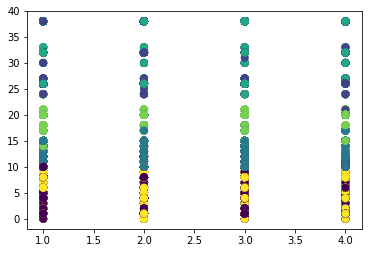

In [35]:
# Plot the predicted clusters for brand to see if the model predicted the correct clusters
plt.scatter(data_df["Brand"],y, c=predicted_clusters, s=50, cmap='viridis')

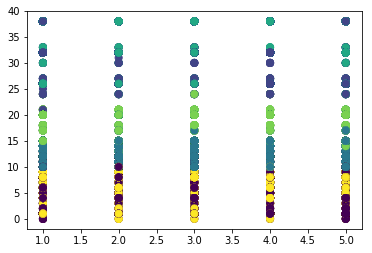

In [36]:
# Plot the predicted clusters for Fabric to see if the model predicted the correct clusters
plt.scatter(data_df["Fabric"],y, c=predicted_clusters, s=50, cmap='viridis')

Text(0,0.5,'Size')

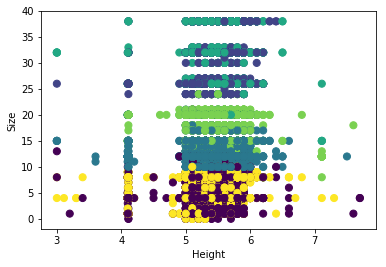

In [44]:
# Plot the predicted clusters for Height to see how the model predicted  clusters.
plt.scatter(data_df["Height"],y, c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel("Height")
plt.ylabel("Size")

Text(0.5,0,'Hip')

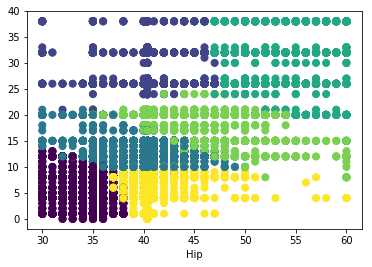

In [40]:
# Plot the predicted clusters for Hip to see how the model predicted  clusters.
plt.scatter(data_df["Hip"],y, c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel("Hip")

Text(0,0.5,'Size')

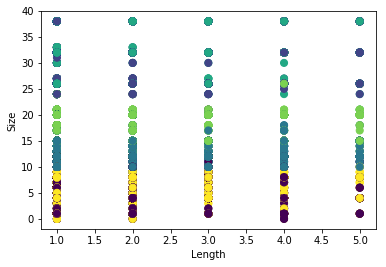

In [41]:
#label=color
# Plot the predicted clusters for Length to see how the model predicted  clusters.
plt.scatter(data_df["Length"],y, c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel("Length")
plt.ylabel("Size")

Text(0,0.5,'Size')

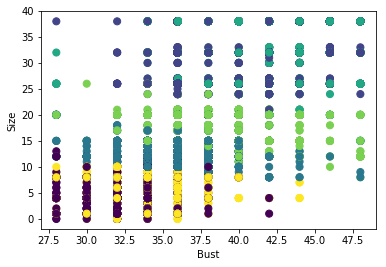

In [43]:
# Plot the predicted clusters for Bust to see how the model predicted  clusters.
plt.scatter(data_df["Bust"],y, c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel("Bust")
plt.ylabel("Size")

In [55]:
#This part is to try GridSearch
#import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [56]:
## Assing X as features and y(depdendent variable) as Size. 
X = data_df.drop("Size", axis=1)
y = data_df["Size"]

In [59]:
X[0:10]

,Brand,Fabric,Bust,Height,Hip,Length
0,4,2,32.000000,5.6,37.000000,1
1,1,5,34.000000,5.6,36.000000,3
2,1,5,34.000000,5.3,40.358501,1
3,3,5,32.000000,5.1,35.000000,2
4,4,2,32.000000,5.6,32.000000,1
5,3,4,34.000000,5.1,40.000000,5
6,2,1,34.000000,5.3,40.358501,2
7,4,1,32.000000,5.6,38.000000,1
8,1,1,35.972125,5.2,40.358501,3
9,4,2,34.000000,5.3,40.358501,1


In [61]:
y[0:10]

0     4
1     4
2     4
3     4
4     4
5     8
6     4
7     8
8    12
9     8
Name: Size, dtype: int64

In [62]:
#Split X and y values into training and testing data for use with the machine learning algorithm.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
print("X-train-shape: " , X_train.shape)
print("y-train-shape: " , y_train.shape)
print("X-test-shape: " , X_test.shape)
print("y-test-shape: " , y_test.shape)

X-train-shape:  (56232, 6)
y-train-shape:  (56232,)
X-test-shape:  (18745, 6)
y-test-shape:  (18745,)


In [69]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 50],
              'gamma': [0.0001,0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\Sivakumar\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[CV] ..... C=1, gamma=0.0001, score=0.38134598976109213, total=13.0min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.0min remaining:    0.0s


[CV] ..... C=1, gamma=0.0001, score=0.37538674917315695, total=13.0min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 27.9min remaining:    0.0s


[CV] .... C=1, gamma=0.0001, score=0.37813600939468345, total=314.2min
[CV] C=1, gamma=0.001 ................................................


In [ ]:
# List the best parameters for this dataset
#print(grid.best_params_)